In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder

In [3]:
!pip install -q tensorflow-text
import tensorflow_text as text
import tensorflow_hub as hub

# Below the code, it's a Universal Sentence Encoder where any text can be converted into tensors easily
USE = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

In [4]:
sent_1 = ["the location is great"]
sent_2 = ["amazing location"]

emb1 = USE(sent_1)
emb2 = USE(sent_2)

print(emb1.shape)
print(np.inner(emb1, emb2).flatten()[0])
# The value will print some equivalent one close to 0.80 to 1

(1, 512)
0.7925468


In [5]:
dataset = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

dataset.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [6]:
# Now, creating two columns for easy view!

dataset["review"] = dataset["reviews.text"]

dataset["score"] = dataset["reviews.rating"].apply(lambda x: "negative" if x<3 else "positive")

# Creating a seperate new variable

df = dataset[["review", "score"]]

In [7]:
# Testing the reviews....
df.head()

# Saving in seperate CSV file, but it's not important
df.to_csv("results.csv")

In [8]:
df.score.value_counts()


positive    26751
negative     1581
Name: score, dtype: int64

In [9]:
# Now, seperating values into two diff values
positive_df = df[df["score"] == "positive"]
negative_df = df[df["score"] == "negative"]

print(positive_df.shape, negative_df.shape)

(26751, 2) (1581, 2)


In [10]:
good_df = positive_df.sample(n=len(negative_df), random_state=42)
bad_df = negative_df


In [11]:
review_df = good_df.append(bad_df).reset_index(drop=True)
review_df.shape

(3162, 2)

In [12]:
review_df.head()

,review,score
0,good batteriess,positive
1,These are great batteries and I only buy them ...,positive
2,"great price, lasts a long time too",positive
3,"My Son absolutely loves this thing, very durab...",positive
4,This was on my wife's Christmas list. She love...,positive


In [13]:
from sklearn.preprocessing import OneHotEncoder

type_one_hot = OneHotEncoder(sparse=False).fit_transform(
  review_df.score.to_numpy().reshape(-1, 1)
)

In [14]:
from sklearn.model_selection import train_test_split

train_reviews, test_reviews, y_train, y_test =\
  train_test_split(
    review_df.review, 
    type_one_hot, 
    test_size=.1, 
    random_state=42
  )

In [15]:
from tqdm import tqdm

X_train = []
for r in tqdm(train_reviews):
  emb = USE(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(review_emb)

X_train = np.array(X_train)

X_test = []
for r in tqdm(test_reviews):
  emb = USE(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(review_emb)

X_test = np.array(X_test)

100%|██████████| 317/317 [00:23<00:00, 13.43it/s]


In [16]:
from keras.utils.vis_utils import plot_model
from keras.layers import LSTM, SpatialDropout1D

model = keras.Sequential()

model.add(
  keras.layers.Dense(
    units=256,
    input_shape=(X_train.shape[1], ),
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(
  keras.layers.Dense(
    units=128,
    activation='relu'
  )
)
model.add(
  keras.layers.Dropout(rate=0.5)
)

model.add(
  keras.layers.Dense(
    units=64,
    activation='relu',
    kernel_regularizer='l1' # This one worked so yes
  )
)

model.add(
  keras.layers.Dropout(rate=0.3)
)

model.add(keras.layers.Dense(2, activation='softmax'))
model.compile(
    loss='categorical_crossentropy', 
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)


print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1

In [17]:
history = model.fit(
    X_train, y_train, 
    epochs=22, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=True
)

Epoch 1/22
160/160 [==============================] - ETA: 2:41 - loss: 7.9401 - accuracy: 0.50 - ETA: 0s - loss: 7.2966 - accuracy: 0.6250 - ETA: 0s - loss: 6.6947 - accuracy: 0.66 - ETA: 0s - loss: 6.1229 - accuracy: 0.69 - ETA: 0s - loss: 5.6224 - accuracy: 0.72 - ETA: 0s - loss: 5.1624 - accuracy: 0.73 - ETA: 0s - loss: 4.7471 - accuracy: 0.74 - ETA: 0s - loss: 4.3297 - accuracy: 0.76 - ETA: 0s - loss: 3.9561 - accuracy: 0.78 - ETA: 0s - loss: 3.6270 - accuracy: 0.79 - ETA: 0s - loss: 3.3372 - accuracy: 0.80 - 2s 6ms/step - loss: 3.3055 - accuracy: 0.8016 - val_loss: 0.5514 - val_accuracy: 0.9263
Epoch 2/22
160/160 [==============================] - ETA: 0s - loss: 0.5904 - accuracy: 0.93 - ETA: 0s - loss: 0.5796 - accuracy: 0.88 - ETA: 0s - loss: 0.5222 - accuracy: 0.90 - ETA: 0s - loss: 0.4919 - accuracy: 0.90 - ETA: 0s - loss: 0.4892 - accuracy: 0.89 - ETA: 0s - loss: 0.4709 - accuracy: 0.89 - ETA: 0s - loss: 0.4588 - accuracy: 0.90 - ETA: 0s - loss: 0.4560 - accuracy: 0.90 - ET

160/160 [==============================] - ETA: 0s - loss: 0.2538 - accuracy: 0.93 - ETA: 0s - loss: 0.1926 - accuracy: 0.97 - ETA: 0s - loss: 0.1836 - accuracy: 0.97 - ETA: 0s - loss: 0.1776 - accuracy: 0.97 - ETA: 0s - loss: 0.1802 - accuracy: 0.97 - ETA: 0s - loss: 0.1763 - accuracy: 0.97 - ETA: 0s - loss: 0.1763 - accuracy: 0.97 - ETA: 0s - loss: 0.1813 - accuracy: 0.97 - ETA: 0s - loss: 0.1808 - accuracy: 0.97 - 1s 3ms/step - loss: 0.1790 - accuracy: 0.9719 - val_loss: 0.2266 - val_accuracy: 0.9368
Epoch 14/22
160/160 [==============================] - ETA: 0s - loss: 0.2923 - accuracy: 0.93 - ETA: 0s - loss: 0.2200 - accuracy: 0.95 - ETA: 0s - loss: 0.1820 - accuracy: 0.97 - ETA: 0s - loss: 0.1815 - accuracy: 0.97 - ETA: 0s - loss: 0.1791 - accuracy: 0.97 - ETA: 0s - loss: 0.1747 - accuracy: 0.97 - ETA: 0s - loss: 0.1755 - accuracy: 0.97 - ETA: 0s - loss: 0.1775 - accuracy: 0.97 - ETA: 0s - loss: 0.1725 - accuracy: 0.97 - ETA: 0s - loss: 0.1723 - accuracy: 0.97 - ETA: 0s - loss: 

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.legend();

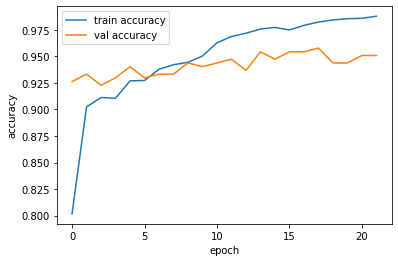

In [19]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend();

In [20]:
model.evaluate(X_test, y_test)

10/10 [==============================] - ETA: 0s - loss: 0.3176 - accuracy: 0.93 - 0s 2ms/step - loss: 0.3496 - accuracy: 0.9180


[0.3495921790599823, 0.9179810881614685]

In [21]:
print(test_reviews.iloc[0])
print("Bad" if y_test[0][0] == 1 else "Good")

Love the HD8 the extra inch makes a huge difference over the HD7.
Good


In [22]:
y_pred = model.predict(X_test[:1])
print(y_pred)
"Bad" if np.argmax(y_pred) == 0 else "Good"

[[2.6506346e-04 9.9973494e-01]]


'Good'

In [23]:
print(test_reviews.iloc[10])
print("Bad" if y_test[1][0] == 1 else "Good")

This fire is much better than the old one so far. It responds much faster and has a much better screen. I also put a 128 gig memory stick into it which the old fire could not accommodate. So far, so good.
Good


In [24]:
model.save("Analysis.h5")